<center><h1>TMDB Movies</h1></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TMDB-Movies" data-toc-modified-id="TMDB-Movies-1">TMDB Movies</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#1.-Data-Wrangling" data-toc-modified-id="1.-Data-Wrangling-3">1. Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#1.1-Gathering" data-toc-modified-id="1.1-Gathering-3.1">1.1 Gathering</a></span></li><li><span><a href="#1.2-Assessing" data-toc-modified-id="1.2-Assessing-3.2">1.2 Assessing</a></span></li><li><span><a href="#1.3-Cleaning" data-toc-modified-id="1.3-Cleaning-3.3">1.3 Cleaning</a></span></li></ul></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-4">2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.1.-Asking-Questions" data-toc-modified-id="2.1.-Asking-Questions-4.1">2.1. Asking Questions</a></span></li><li><span><a href="#2.2-Analysis-and-Visualization" data-toc-modified-id="2.2-Analysis-and-Visualization-4.2">2.2 Analysis and Visualization</a></span></li><li><span><a href="#2.3-Conclusion" data-toc-modified-id="2.3-Conclusion-4.3">2.3 Conclusion</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

# Introduction

This project started as an assessment for the **Udacity Data Analysis Advanced Track**.

The Movie Database (TMDb) is a community built movie and TV database dating back to 2008.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.


# 1. Data Wrangling

We begin by importing the libraries that we will be using for our analysis:
- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/stable/index.html#)
- [Seaborn](https://seaborn.pydata.org/)

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.1 Gathering

### TMDB Data

We can read the TMDB data directly from the `tmdb-movies.csv` file using pandas `read_csv` function.

In [2]:
df_tmdb = pd.read_csv('tmdb-movies.csv', index_col='id')
df_tmdb.sample(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
10521,tt0901476,1.074072,30000000,114663461,Bride Wars,Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...,http://www.bridewars.com,Gary Winick,May the best bride win,bride|friendship|engagement|rivalry|wedding,Two best friends become rivals when their resp...,89,Comedy,Dune Entertainment|Regency Enterprises|Fox 200...,1/9/09,501,5.8,2009,3.049201e+07,1.165440e+08
9320,tt0118661,0.539133,60000000,48522832,The Avengers,Ralph Fiennes|Uma Thurman|Sean Connery|Patrick...,NaN,Jeremiah S. Chechik,Saving the World in Style.,london|weather manipulation|wretch,"British Ministry agent John Steed, under direc...",89,Thriller,Jerry Weintraub Productions|Warner Bros.,8/13/98,121,4.6,1998,8.026173e+07,6.490877e+07
22171,tt0082776,0.237359,62000,0,Ms .45,ZoÃ« Lund|Albert Sinkys|Darlene Stuto|Abel Fer...,NaN,Abel Ferrara,She was abused and violated. It will never hap...,new york|rape|revenge|independent film|mute,A shy and mute seamstress goes insane after be...,81,Horror|Crime|Drama|Thriller,Navaron Films,4/24/81,23,5.5,1981,1.486878e+05,0.000000e+00


Note that the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [3]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

### IMDB Data

To compare the TMDB ratings with the IMDB ratings, I tried first to scrape the data first using BeautifulSoup library, but the scraping process was taking more than 4 hours which was not efficient. 

Instead it was decided to better download it manualy from the following url:
https://datasets.imdbws.com/ and then it can be read into a pandas Dataframe using the `read_csv` method with '\t' as the separator since the downloaded files where in .tsv format.



In [4]:
df_imdb = pd.read_csv('title.ratings.tsv', sep='\t')

df_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1680
1,tt0000002,6.0,207
2,tt0000003,6.5,1418
3,tt0000004,6.1,122
4,tt0000005,6.1,2214


## 1.2 Assessing

We first check if there's any duplicated values in the `df_tmdb` DataFrame.

In [5]:
df_tmdb[df_tmdb.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df_tmdb[df_tmdb['original_title'] == 'TEKKEN']

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Only one row is duplicated which is the title 'TEKKEN' with the exact same data.So, it can be safely removed later.

In [7]:
df_tmdb.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The columns 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres' and 'production_companies' have Null values.

In [8]:
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Investigating the table above, we can see from the min row that the `budget`, `revenue`, `runtime`, `budget_adj` and `revenue_adj` contain zero values.

In [9]:
# check for entries where budget or revenue equals 0
df_tmdb.query(
    'budget == 0 or revenue == 0 or budget_adj == 0 or revenue_adj == 0 or runtime == 0').shape

(7011, 20)

7011 rows have 0 budget or revenue or 0 runtime.

In [10]:
df_tmdb.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We also need to investigate the data from IMDB ratings.

In [11]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123371 entries, 0 to 1123370
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1123371 non-null  object 
 1   averageRating  1123371 non-null  float64
 2   numVotes       1123371 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 25.7+ MB


The `df_imdb` dataframe contains the right vriable types. but will need to be merged with the TMDB data for analysis.

Also, the columns' names will need to be adjusted to be easily merged later on.

### Quality Issues

1. missing data in the following columns: `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`,  `genres` and `production_companies`
2. Zero values found in columns: `budget`, `revenue`, `budget_adj`, `revenue_adj` and `runtime`.
3. The columns `cast`, `keywords` `genres` and `production_companies` contains strings separated by '|' instead of a list of items.
4. `release_date` column is of type string instead of datetime. 

### Tidiness Issues
1. The columns `cast`, `keywords` `genres` and `production_companies` values exist as one entry. Needs adjustments to be able to analyze each cast member, keyword, genre or production company separately.
2. The IMDB DataFrame should be merged with the original TMDB DataFrame so that every row represent an observation.

## 1.3 Cleaning

#### Define

- Remove Duplicates using pandas `drop_duplicates` function.

#### Code

In [12]:
df_clean = df_tmdb.drop_duplicates()

#### Test

In [13]:
df_clean.duplicated().any()

False

#### Define

Drop the columns that are not relevant to our analysis which are: `homepage`, `tagline`, `overview`.

#### Code

In [14]:
df_clean = df_tmdb.drop(
    ['homepage', 'tagline', 'overview'], axis=1)

#### Test

In [15]:
df_clean.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

#### Define

Splitting the  `cast`, `keywords`, `genres` and `production_companies` columns using the str.split function with '|' as the separator.

Then we collect the unique values in all the columns by defining a custom function `to_1D` that converts the multi-dimensional arrays into one dimension and then getting the value counts of each column. as we will need these values later for our analysis.

#### Code

In [16]:
# the columns to split
cols = ['cast', 'keywords', 'genres', 'production_companies']
# a dictionary to store unique values of each column
unique = {}


def to_1D(series):
    """
    converts a 2D series to a 1D series
    """
    return pd.Series([x for _list in series for x in _list], dtype='object')


for col in cols:
    df_clean[col] = df_clean[col].str.split('|')
    unique[col] = to_1D(df_clean[col].dropna()).value_counts().index

#### Test

In [17]:
df_clean.sample(3)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,
9877,tt0146336,0.783938,14000000,72527595,Urban Legend,"[Alicia Witt, Jared Leto, Rebecca Gayheart, Mi...",Jamie Blanks,"[college, murder, urban legend, slasher, killer]",99,"[Horror, Thriller]","[Original Film, TriStar Pictures, Phoenix Pict...",9/25/98,144,5.4,1998,1.872774e+07,9.701984e+07
12877,tt0419677,0.144917,0,0,Dead Man's Shoes,"[Paddy Considine, Gary Stretch, Toby Kebbell, ...",Shane Meadows,"[rage and hate, brother, revenge, punishment, ...",90,"[Drama, Thriller, Crime]","[EM Media, Big Arty Productions, Film4, Warp F...",9/29/04,50,7.3,2004,0.000000e+00,0.000000e+00
18632,tt0796314,0.228338,120000,0,A Dog's Breakfast,"[David Hewlett, Kate Hewlett, Paul McGillion, ...",David Hewlett,[independent film],88,[Comedy],[Kibble Productions],3/3/07,11,4.9,2007,1.262002e+05,0.000000e+00


In [18]:
unique

{'cast': Index(['Robert De Niro', 'Samuel L. Jackson', 'Bruce Willis', 'Nicolas Cage',
        'Michael Caine', 'Robin Williams', 'John Cusack', 'John Goodman',
        'Morgan Freeman', 'Liam Neeson',
        ...
        'Brian Wimmer', 'Daniel Hoesl', 'Sarah Rose Karr', 'Louis Negin',
        'Darryl Stephens', 'Louis Prima', 'Tumisho Masha', 'Kimberly Peirce',
        'Lincoln Lewis', 'Dominique SaldaÃ±a'],
       dtype='object', length=19026),
 'keywords': Index(['woman director', 'independent film', 'based on novel', 'sex', 'sport',
        'murder', 'biography', 'musical', 'new york', 'suspense',
        ...
        'arjun', 'woman played by man', 'dog actor', 'florence', 'rude waiter',
        'gold bar', 'strip', 'prehistoric man', 'eyesight', 'settle scores'],
       dtype='object', length=7878),
 'genres': Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
        'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
        'Animation', '

#### Define

- Fix the runtime zero values by replacing them with the mean value.

#### Code

In [19]:
df_clean['runtime'].value_counts().sort_index()

0      31
2       5
3      11
4      17
5      17
       ..
561     1
566     1
705     1
877     1
900     1
Name: runtime, Length: 247, dtype: int64

In [20]:
df_clean['runtime'].replace(0, df_clean['runtime'].mean(), inplace=True)

#### Test

In [21]:
df_clean[df_clean['runtime'] == 0]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,


#### Define

- we can use the same technique for the budget and revenue columns

#### Code

In [22]:
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    df_clean[col].replace(0, df_clean[col].mean(), inplace=True)

#### Test

In [23]:
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    print(df_clean[df_clean[col] == 0][col].count())

0
0
0
0


#### Define

- Extract the release month from the release date by splitting into columns using the str.split function with '/' as the separator and get only the month as the date format is MM/DD/YY.

#### Code

In [24]:
#extract the release month from the release_date column
df_clean['release_month'] = df_clean['release_date'].str.split(
    '/', expand=True)[0]


In [25]:
# convert the release month column to Integer type
df_clean['release_month'] = df_clean['release_month'].astype(int)

#### Test

In [26]:
df_clean['release_month'].value_counts()

9     1331
10    1153
12     985
1      919
8      918
6      827
3      823
11     814
5      809
7      799
4      797
2      691
Name: release_month, dtype: int64

#### Define

- In order to merge the IMDB Data into the TMDB one, we need to first clean the imdb dataframe and name the columns accordingly.


#### Code

In [27]:
df_imdb.columns = ['imdb_id', 'imdb_rating', 'imdb_votes']

#### Test

In [28]:
df_imdb.columns

Index(['imdb_id', 'imdb_rating', 'imdb_votes'], dtype='object')

#### Define

we now need to merge the two dataframes using the merge method.

#### Code

In [29]:
df_clean = df_clean.merge(df_imdb, on='imdb_id')

#### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10852 entries, 0 to 10851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10852 non-null  object 
 1   popularity            10852 non-null  float64
 2   budget                10852 non-null  float64
 3   revenue               10852 non-null  float64
 4   original_title        10852 non-null  object 
 5   cast                  10776 non-null  object 
 6   director              10812 non-null  object 
 7   keywords              9366 non-null   object 
 8   runtime               10852 non-null  float64
 9   genres                10831 non-null  object 
 10  production_companies  9827 non-null   object 
 11  release_date          10852 non-null  object 
 12  vote_count            10852 non-null  int64  
 13  vote_average          10852 non-null  float64
 14  release_year          10852 non-null  int64  
 15  budget_adj         

### Storing Data

Now that we have successfully cleaned our data, we need to save to and external file to use it later in our analysis.

In [31]:
df_clean.to_csv('tmdb-clean.csv', index=False)

# 2. Exploratory Data Analysis

## 2.1. Asking Questions

During our data wrangling and analysis we will try to answer the following questions:

- How did the movie industry budget and revenue changed over the years?
- How is the voting (rating) is distributed?
- How does the TMDB average vote compares to the IMDB ratings?
- What factors affect the rating of a given movie (budget, revenue, release month, release year,...)?

## 2.2 Analysis and Visualization

We Begin by importing the cleaned data from the file `tmdb-clean.csv`.

In [32]:
df = pd.read_csv('tmdb-clean.csv', index_col='imdb_id')

In [33]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,,
tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...",Colin Trevorrow,"['monster', 'dna', 'tyrannosaurus rex', 'veloc...",124.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Universal Studios', 'Amblin Entertainment', ...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,7.0,580217
tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Hugh Keays-B...",George Miller,"['future', 'chase', 'post-apocalyptic', 'dysto...",120.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Village Roadshow Pictures', 'Kennedy Miller ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,8.1,884401
tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,"['Shailene Woodley', 'Theo James', 'Kate Winsl...",Robert Schwentke,"['based on novel', 'revolution', 'dystopia', '...",119.0,"['Adventure', 'Science Fiction', 'Thriller']","['Summit Entertainment', 'Mandeville Films', '...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,6.2,218262


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10852 entries, tt0369610 to tt0060666
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10852 non-null  float64
 1   budget                10852 non-null  float64
 2   revenue               10852 non-null  float64
 3   original_title        10852 non-null  object 
 4   cast                  10776 non-null  object 
 5   director              10812 non-null  object 
 6   keywords              9366 non-null   object 
 7   runtime               10852 non-null  float64
 8   genres                10831 non-null  object 
 9   production_companies  9827 non-null   object 
 10  release_date          10852 non-null  object 
 11  vote_count            10852 non-null  int64  
 12  vote_average          10852 non-null  float64
 13  release_year          10852 non-null  int64  
 14  budget_adj            10852 non-null  float64
 15  revenue_adj 

We can begin by plotting the top rated movies of all time by sorting the values by the `vote_average` column in descending order.

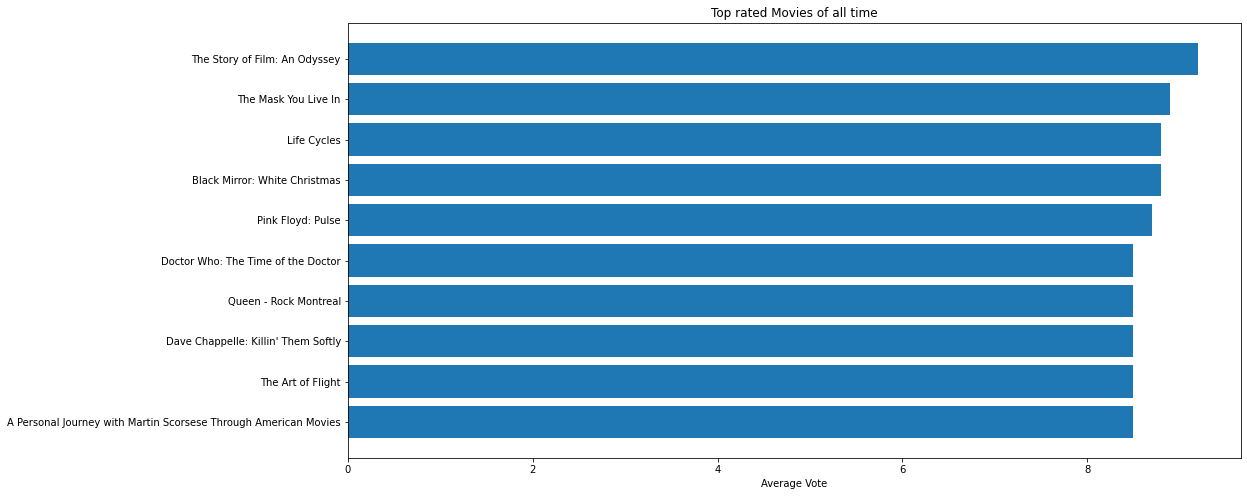

In [35]:
data = df.sort_values('vote_average',ascending=False).head(10)
y = data['original_title']
x =data['vote_average']

fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y,x, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Vote')
ax.set_title('Top rated Movies of all time')

plt.show()



Given that we have both TMDB and IMDB ratings data. We can plot them together to see how they relate to each other.

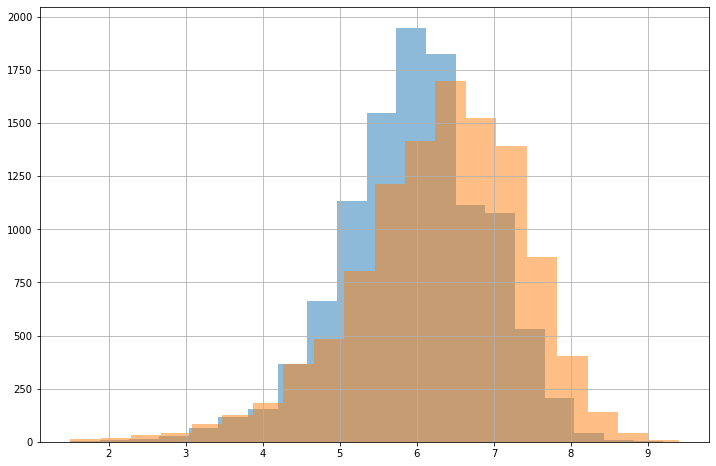

In [36]:
plt.figure(figsize=(12,8))

df['vote_average'].hist(bins=20, alpha = 0.5)
df['imdb_rating'].hist(bins=20, alpha=0.5)

plt.show()

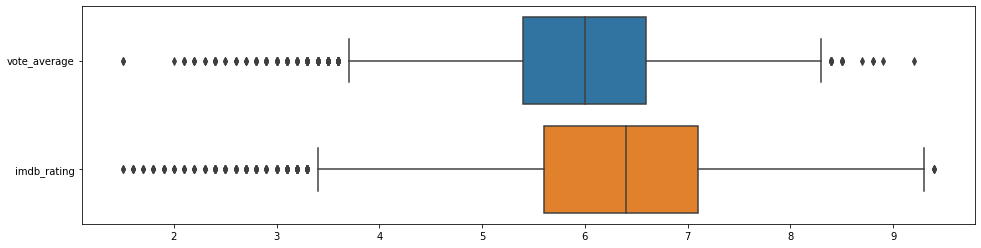

In [37]:
plt.figure(figsize=(16,4))

sns.boxplot(data = df[['vote_average','imdb_rating']],orient="h");

From the two previous diagrams, we can see that the IMDB rating are more left-skewed than the TMDB ones with a higher average rating and a slightly larger spread. 

Now let's check if the rating actually depend on other factors such as the budget and the revenue.
We can divide theses values into chunks (bins) so we can easily represent them in a bar chart.

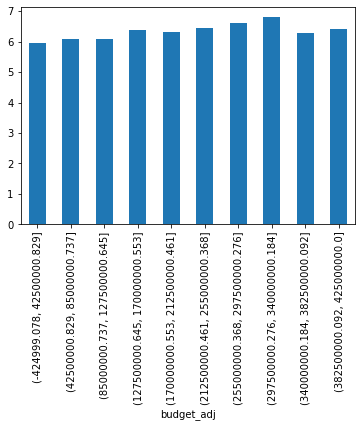

In [38]:
df.groupby(pd.cut(df['budget_adj'], 10))['vote_average'].mean().plot(kind='bar');

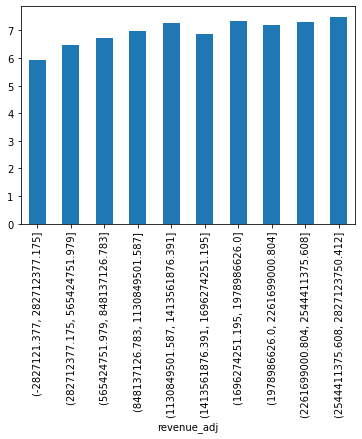

In [39]:
df.groupby(pd.cut(df['revenue_adj'], 10))['vote_average'].mean().plot(kind='bar');

Interestingly enough, the budget and the revenue of a a movie doesn't seem to have a direct connection with its rating

Now let's check how the movie industry have changed over time by plotting various variables against the `release_year` column.

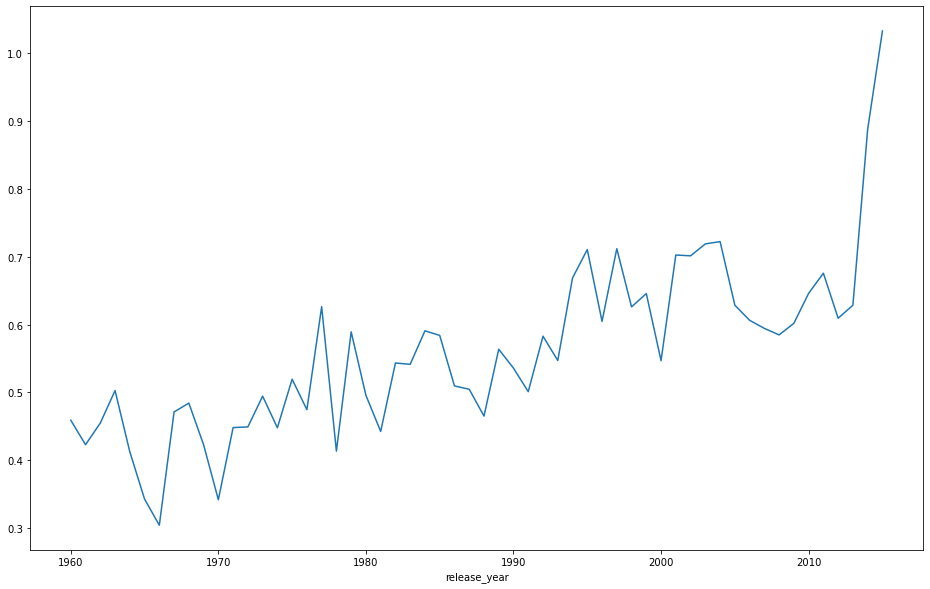

In [40]:
df.groupby(['release_year'])['popularity'].mean().plot(figsize=(16, 10));

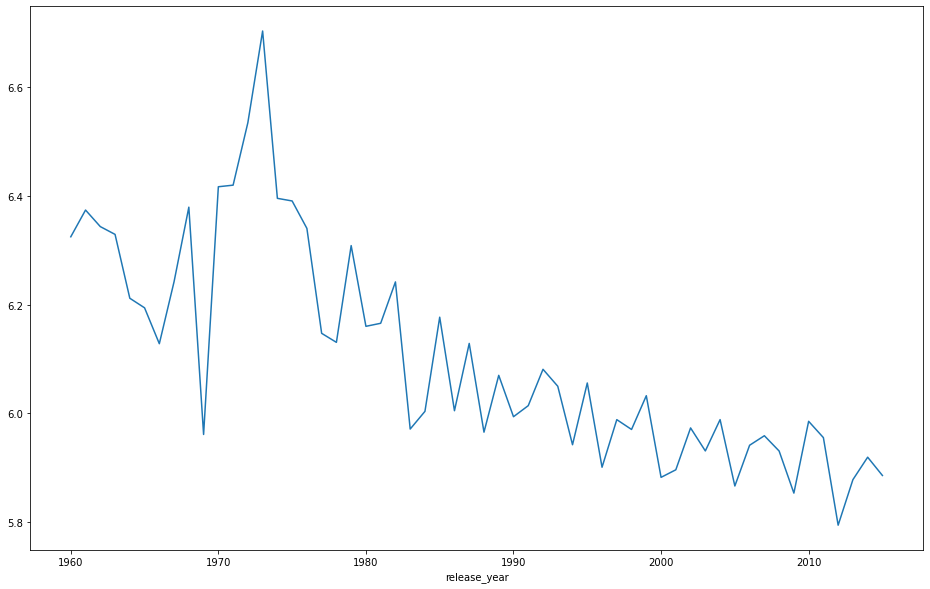

In [41]:
df.groupby(['release_year'])['vote_average'].mean().plot(figsize=(16, 10));

It's clear that even though the popularity have increased over time, the average rating has significantly decreased over time. We can clearly see that the seventies were the golden age no doubt.

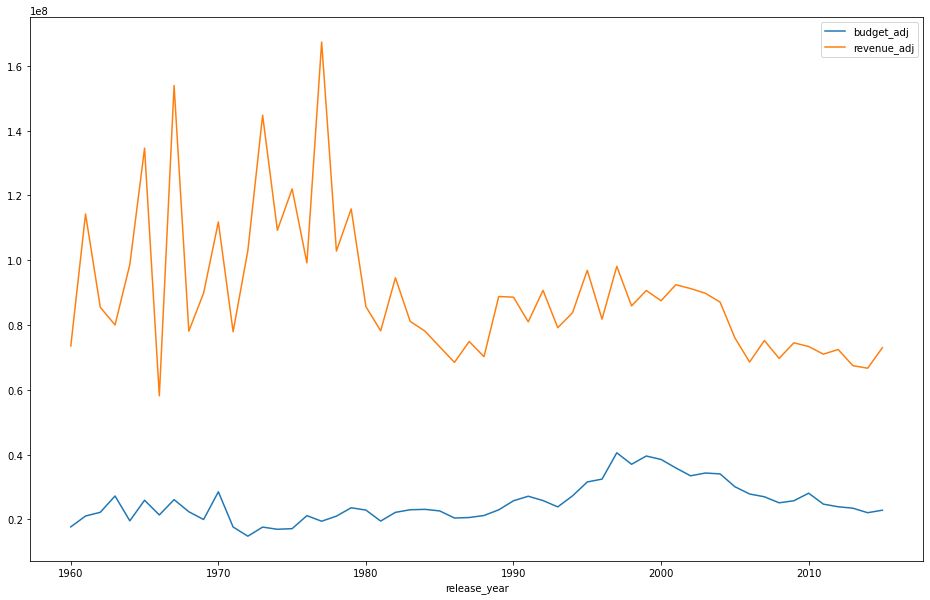

In [42]:
df.groupby(['release_year'])[['budget_adj', 'revenue_adj']].mean().plot(figsize=(16, 10));

During the seventies apparently the movie industry was highly profitable even though the average budget was very low. There seems to be an increase in the investments during the nineties. However, the revenue seemed to decline ever since and later, the investment stared decreasing as well since the 2000s.

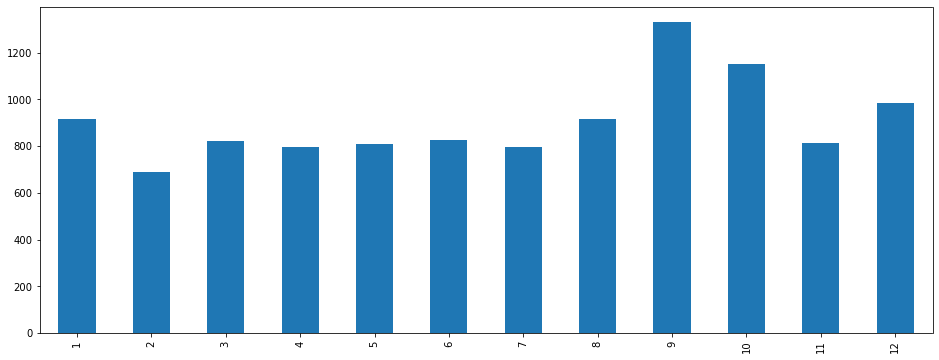

In [43]:
# calculate release month
df['release_month'] = df['release_date'].str.split(
    '/', expand=True)[0].astype(int)
df['release_month'].value_counts().sort_index().plot(kind='bar', figsize=(16, 6));

Obviously there are more titles release in September and October compared to the rest of the year. That shows the seasonality of the movie industry in general. 

In [44]:
# most common genres
to_1D(df['genres'].dropna().str.strip('[]').str.split(',')).value_counts()[:10]

'Drama'               2452
 'Thriller'           2417
'Comedy'              2317
 'Drama'              2306
'Action'              1587
 'Romance'            1526
 'Comedy'             1473
 'Family'             1085
 'Science Fiction'    1010
 'Crime'               974
dtype: int64

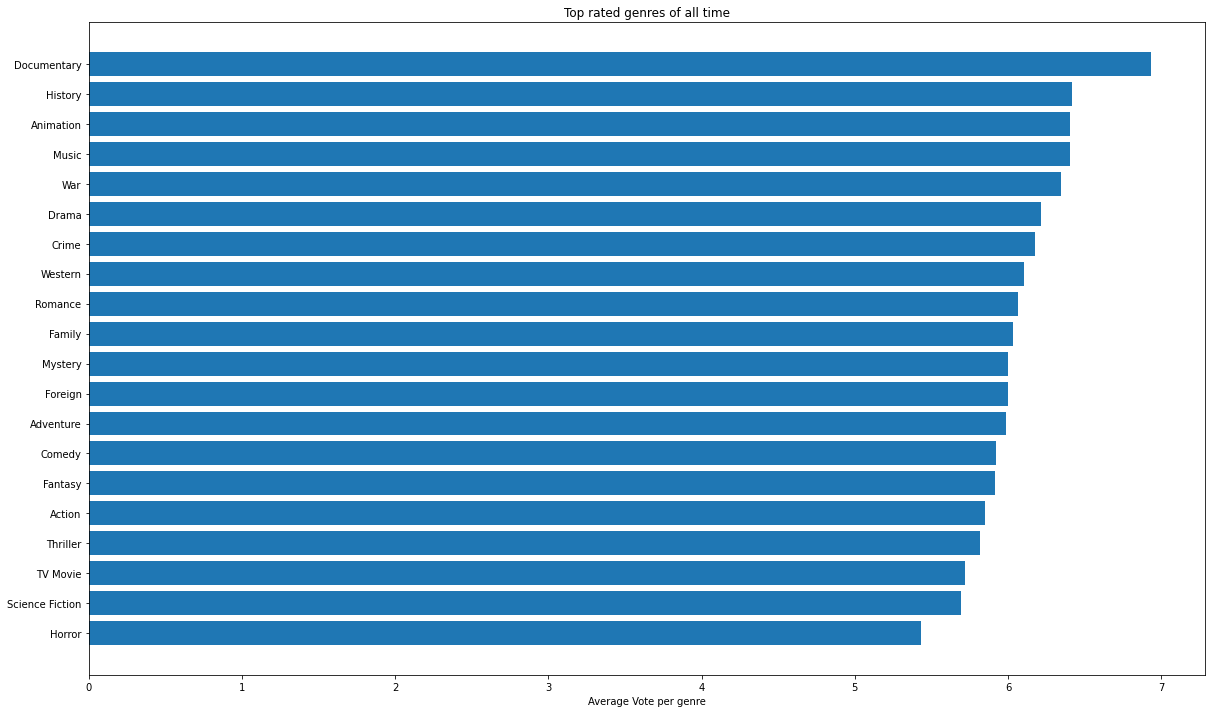

In [45]:
# a dictionary to hold the mean vote_average for each genre
genres = {}

for genre in unique['genres']:
    genres[genre] = df.dropna()[df.dropna()['genres'].str.contains(genre)]['vote_average'].mean()

data = pd.Series(genres).sort_values(ascending = False)
y = data.index
x = data.values

fig, ax = plt.subplots(figsize=(20,12))
ax.barh(y,x, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Vote per genre')
ax.set_title('Top rated genres of all time')

plt.show()


The most produced genres are actually not the top rated ones.

In [46]:
# Most common actors
to_1D(df.dropna()['cast'].str.strip('[]').str.split(',')).value_counts()[:10]

'Nicolas Cage'          48
 Jr.'                   45
'Robert De Niro'        39
'Bruce Willis'          39
'Clint Eastwood'        38
 'Samuel L. Jackson'    38
'Johnny Depp'           37
'Tom Hanks'             37
 'Willem Dafoe'         36
 'Steve Buscemi'        36
dtype: int64

In [47]:
# The most common Production Companies
to_1D(df.dropna()['production_companies'].str.strip('[]').str.split(',')).value_counts()[:10]

'Universal Pictures'                        429
'Paramount Pictures'                        415
 'Warner Bros.'                             330
'Columbia Pictures'                         267
'Twentieth Century Fox Film Corporation'    236
'New Line Cinema'                           197
'Walt Disney Pictures'                      191
'Warner Bros.'                              165
'Miramax Films'                             129
'TriStar Pictures'                          120
dtype: int64

In [48]:
# the most used keywords
to_1D(df.dropna()['keywords'].str.strip('[]').str.split(',')).value_counts()[:10]

 'woman director'          236
 'independent film'        232
 'murder'                  177
 'based on novel'          150
 'sex'                     148
 'nudity'                  141
 'sport'                   139
'new york'                 133
 'duringcreditsstinger'    123
'based on novel'           121
dtype: int64

## 2.3 Conclusion

We can now try to answer the questions we posed earlier:

- How did the movie industry budget and revenue changed over the years?
    - During the seventies apparently the movie industry was highly profitable even though the average budget was very low. There seems to be an increase in the investments during the nineties. However, the revenue seemed to decline ever since and later, the investment stared decreasing as well since the 2000s.
- How is the voting (rating) is distributed?
    - The average vote seems to be normally distributed with an average vote of 6.

- How does the TMDB average vote compares to the IMDB ratings?
    - the IMDB rating are more left-skewed than the TMDB ones with a higher average rating and a slightly larger spread. 

- What factors affect the rating of a given movie (budget, revenue, release month, release year,...)?
    - The budget and revenue don't seem to have an influence on the ratings. However, The release year affect the rating dramatically. People seem to give higher ratings for movies released in the early seventies.




# References

- [Scrape IMDB movie rating and details using python](https://dev.to/magesh236/scrape-imdb-movie-rating-and-details-3a7c)
- [pandas.Series.str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html#pandas.Series.str.split)
- [Dealing with List Values in Pandas Dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
- [Are you confused using Series.str.contains() and DataFrame.isin() then look into this article](https://medium.com/analytics-vidhya/filter-pandas-dataframe-rows-by-a-list-of-strings-e95c225822fa)